<a href="https://colab.research.google.com/github/dhruvsaini13/DEEP-LEARNING-LAB/blob/main/DL_LAB_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Implementation of Backpropagation with Gradient Descent**

In [ ]:
import numpy as np
# defining inputs
x1=0.6
x2=0.1
y=1

# defining parameters
w1, w2 = 0.2, -0.3
b=0.4
lr = 0.1

z=(w1*x1)+(w2*x2)+b
y_pred = 1/1+(np.exp(-z))

# derivative of Loss
dL_dy_pred = y_pred - y

dy_pred_dz = y_pred*(1-y_pred)

dL_dz = dL_dy_pred * dy_pred_dz

# Gradients
dz_dw1 = x1
dz_dw2 = x2
dz_db = 1

dL_dw1 = dL_dz * dz_dw1
dL_dw2 = dL_dz * dz_dw2
dL_db = dL_dz * dz_db

# Updates
w1 = w1 - lr*dL_dw1
w2 = w2 - lr*dL_dw2
b = b - lr*dL_db
print(w1, w2, b)

0.23631419504228743 -0.2939476341596188 0.4605236584038124


**Implementation for AND Gate**

In [ ]:
import numpy as np
# defining inputs
x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,0,0,1])

# defining parameters
w = np.array([0.1, 0.2])
b=0.3
lr = 0.1

def sigmoid(z):
  return 1/(1+np.exp(-z))

# Training
for epochs in range(1000):
  for i in range(len(x)):
    z=np.dot(x[i], w)+b
    y_pred = sigmoid(z)

    # BCE + Sigmoid Gradient shortcut
    dz = y_pred - y[i]
    dw = x[i]*dz
    db = dz

    w = w-lr*dw
    b = b-lr*db

print("Updated Weights:", w)
print("Updated Bias:", b)

Updated Weights: [5.60154076 5.59544869]
Updated Bias: -8.565987677634602


**Implementation for OR Gate**

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# inputs
x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,1])

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def loss(y, y_pred):
    return -np.mean(y*np.log(y_pred + 1e-8) + (1-y)*np.log(1-y_pred + 1e-8))

# training function
def train( lr, epochs=100): # x, y,
    w = np.array([0.1, 0.2])
    b = 0.3
    loss_history = []

    for _ in range(epochs):
        y_preds = []
        for i in range(len(x)):
            z = np.dot(x[i], w) + b
            y_pred = sigmoid(z)
            y_preds.append(y_pred)

            dz = y_pred - y[i]
            w -= lr * x[i] * dz
            b -= lr * dz

        loss_history.append(loss(y, np.array(y_preds)))

    return w, b, np.mean(loss_history)

loss_li = []
lr_list = np.linspace(0.001, 0.1, 10)
for lri in lr_list:
  _, _, losses = train(lr=lri, epochs=100) # x, y,
  loss_li.append(losses)


print(loss_li)
print(lr_list)



[np.float64(0.5535578045180827), np.float64(0.46346797883880875), np.float64(0.42245541290241007), np.float64(0.39376914276057484), np.float64(0.37073059478314213), np.float64(0.3512010829229753), np.float64(0.33420076907183843), np.float64(0.31916351306950747), np.float64(0.30571332309552424), np.float64(0.29357930010623695)]
[0.001 0.012 0.023 0.034 0.045 0.056 0.067 0.078 0.089 0.1  ]


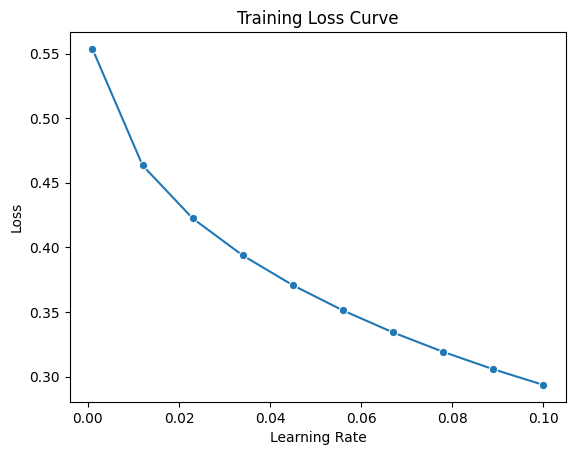

In [ ]:
sns.lineplot(x=lr_list, y=loss_li, marker='o')
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()